# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Import-useful-Python-packages" data-toc-modified-id="Import-useful-Python-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import useful Python packages</a></div><div class="lev1 toc-item"><a href="#Import-data" data-toc-modified-id="Import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data</a></div><div class="lev1 toc-item"><a href="#Explore" data-toc-modified-id="Explore-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore</a></div><div class="lev1 toc-item"><a href="#How-to-look-at-data?" data-toc-modified-id="How-to-look-at-data?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>How to look at data?</a></div><div class="lev2 toc-item"><a href="#Do-we-have-missing-values?" data-toc-modified-id="Do-we-have-missing-values?-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Do we have missing values?</a></div><div class="lev2 toc-item"><a href="#Values-in-our-data" data-toc-modified-id="Values-in-our-data-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Values in our data</a></div><div class="lev2 toc-item"><a href="#Can-we-visualise?" data-toc-modified-id="Can-we-visualise?-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Can we visualise?</a></div><div class="lev1 toc-item"><a href="#Can-we-find-similar-groups-of-users?" data-toc-modified-id="Can-we-find-similar-groups-of-users?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Can we find similar groups of users?</a></div><div class="lev2 toc-item"><a href="#KMeans-clustering" data-toc-modified-id="KMeans-clustering-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>KMeans clustering</a></div><div class="lev3 toc-item"><a href="#Let's-try-with-5-clusters" data-toc-modified-id="Let's-try-with-5-clusters-511"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Let's try with 5 clusters</a></div><div class="lev3 toc-item"><a href="#Let's-try-with-3-clusters" data-toc-modified-id="Let's-try-with-3-clusters-512"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Let's try with 3 clusters</a></div>

# Import useful Python packages

In [1]:
import pandas as pd
import numpy as np

# Import data

In [4]:
# TODO: change to Kaggle URL

path = '/Users/elenahensinger/Documents/PROJECTS/2019/09_WorkshopWednesdays_W1/datasets'
usage_df = pd.read_csv(path + '/workshop_data1.csv')

usage_df.head(5)

,12am_8am,8am_2pm,2pm_9pm,9pm_12am
0,1.8,1.4,2.6,0.2
1,1.5,1.4,2.4,NaN
2,1.6,1.3,2.4,0.2
3,1.6,1.5,2.3,0.2
4,1.8,1.4,2.5,0.2


--- 
Each row is average weekly measurement by one participating household.   
Each household participated only once, i.e. each row is a unique household.   
Four columns, showing kWh usage in the time windows morning, first half of the day, second half of the day, evening and night.

# Explore

# How to look at data?

In [11]:
# head + number of rows; default values is 5

usage_df.head()

,12am_8am,8am_2pm,2pm_9pm,9pm_12am
0,1.8,1.4,2.6,0.2
1,1.5,1.4,2.4,NaN
2,1.6,1.3,2.4,0.2
3,1.6,1.5,2.3,0.2
4,1.8,1.4,2.5,0.2


In [12]:
# tail + number of rows; default values is 5
usage_df.tail(2)

,12am_8am,8am_2pm,2pm_9pm,9pm_12am
148,1.7,5.4,3.1,2.3
149,1.5,5.1,3.0,1.8


In [13]:
# a random sample
usage_df.sample(3)

,12am_8am,8am_2pm,2pm_9pm,9pm_12am
63,1.4,4.7,3.0,NaN
39,1.7,1.5,2.6,0.2
24,1.7,1.9,2.4,0.2


In [15]:
# look only at column '8am_2pm' and '2pm_9pm'
usage_df[['8am_2pm','2pm_9pm']]

,8am_2pm,2pm_9pm
0,1.4,2.6
1,1.4,2.4
2,1.3,2.4
3,1.5,2.3
4,1.4,2.5
...,...,...
145,5.2,3.4
146,5.0,3.2
147,5.2,3.2
148,5.4,3.1


In [23]:
# look at a slice of rows: provide start and end row number
usage_df.loc[25:30]

,12am_8am,8am_2pm,2pm_9pm,9pm_12am
25,1.5,NaN,2.5,0.2
26,1.7,1.6,2.5,0.4
27,1.8,1.5,2.6,0.2
28,1.7,1.4,2.6,0.2
29,1.6,1.6,2.4,0.2
30,1.6,1.6,2.4,0.2


In [ ]:
# challenge: combine selection or rows and columns

## Do we have missing values?

In [9]:
usage_df.isnull().sum()

12am_8am    4
8am_2pm     2
2pm_9pm     1
9pm_12am    3
dtype: int64

In [10]:
np.where(usage_df.isnull())

# data is in a table
# first list shows the row number (counting starts at 0)
# second list shows the column number (counting starts at 0)

(array([  1,   7,  25,  47,  57,  63,  66,  80,  97, 100]),
 array([3, 3, 1, 1, 0, 3, 0, 2, 0, 0]))

In [28]:
usage_df.loc[[1,7,25]]

,12am_8am,8am_2pm,2pm_9pm,9pm_12am
1,1.5,1.4,2.4,NaN
7,1.7,1.5,2.5,NaN
25,1.5,NaN,2.5,0.2


---

What does this mean???  

Ideas:
* users forgot to record data
* device did not record data
* users decided not to record data
* data got lost or corrupted during export to us

How should we handle this?
* go back to client and ask what happened
* request correction or more data
* replace with some values
* skip this data

In [29]:
# drop the rows with missing data
usage_df.drop(usage_df.index[[  1,   7,  25,  47,  57,  63,  66,  80,  97, 100]],inplace=True)

In [30]:
# check that this worked

usage_df.isnull().sum()

12am_8am    0
8am_2pm     0
2pm_9pm     0
9pm_12am    0
dtype: int64

## Values in our data

In [33]:
# how many data rows do we have?

len(usage_df)

140

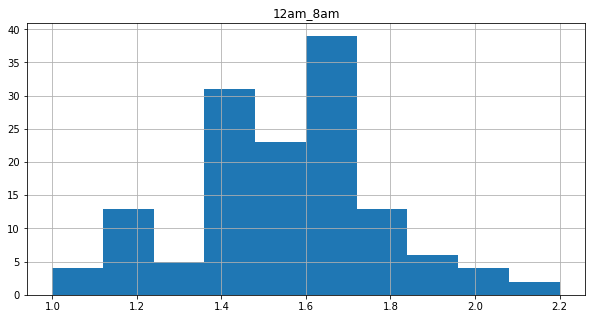

In [38]:
usage_df[['12am_8am']].hist(figsize=(10,5));

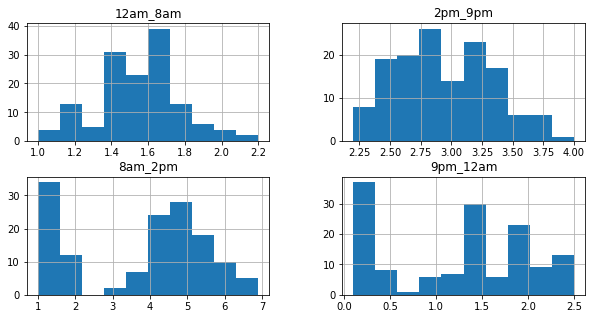

In [36]:
usage_df.hist(figsize=(10,5));

## Can we visualise?

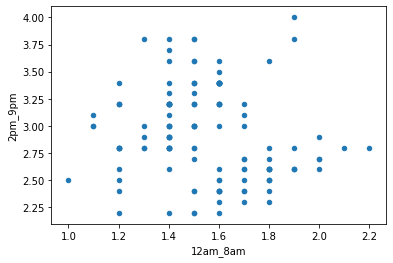

In [59]:
usage_df.plot.scatter(x='12am_8am',y='2pm_9pm')

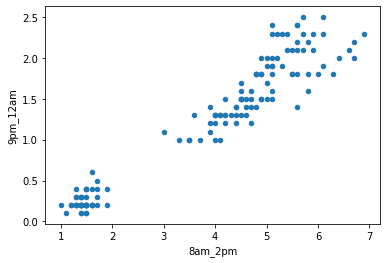

In [58]:
usage_df.plot.scatter(x='8am_2pm',y='9pm_12am')

# Can we find similar groups of users?

Clustering = find groups of items that are similar to each other, and dissimilar to other group members

## KMeans clustering

Read more https://en.wikipedia.org/wiki/K-means_clustering

In [44]:
# source: https://en.wikipedia.org/wiki/K-means_clustering

from IPython.core.display import HTML 
HTML('<img src="kmeans_algorithm.png" width=1000/>')

In [54]:
from sklearn.cluster import KMeans # clustering algorithm
import matplotlib.pyplot as plt # library for plotting

### Let's try with 5 clusters

In [52]:
kmeans_5_clusters = KMeans(n_clusters=5).fit(usage_df)

In [53]:
kmeans_5_clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 4, 2, 2, 2, 3, 4, 3, 2, 3, 2, 2, 2, 4, 2, 2, 2, 3, 3, 4,
       2, 4, 3, 4, 2, 3, 4, 4, 2, 2, 3, 3, 2, 4, 2, 3, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 4, 2, 2, 4], dtype=int32)

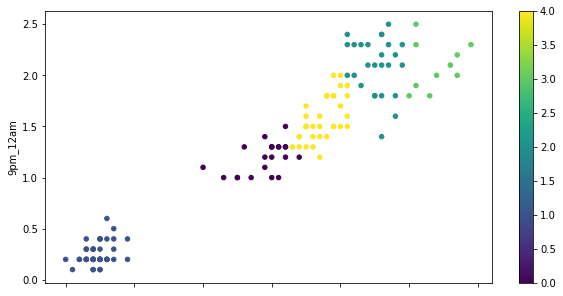

In [63]:
usage_df.plot.scatter(x='8am_2pm',y='9pm_12am',c=kmeans_5_clusters.labels_,cmap='viridis',figsize=(10,5))

In [91]:
data1 = go.Scatter3d(
    x=usage_df['8am_2pm'],
    y=usage_df['9pm_12am'],
    z=usage_df['12am_8am'],
    mode='markers',
    marker=dict(
        size=12,
        color=kmeans_5_clusters.labels_,
        colorscale="Viridis",
        opacity=1,
        line=dict(
            width=0.5,
            color = 'black'
        ),
    ),
)
        

layout = dict(title = '5 clusters of usage data')

fig = {
    'data': [data1],
    'layout': layout
}
plotly.offline.iplot(fig, filename='shapes-circle')


### Let's try with 3 clusters

In [92]:
kmeans_3_clusters = KMeans(n_clusters=3).fit(usage_df)

In [93]:
kmeans_3_clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

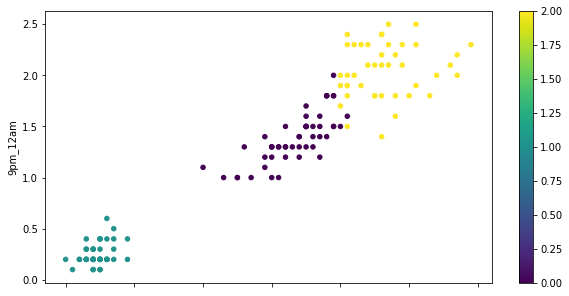

In [94]:
usage_df.plot.scatter(x='8am_2pm',y='9pm_12am',c=kmeans_3_clusters.labels_,cmap='viridis',figsize=(10,5))

In [96]:
data1 = go.Scatter3d(
    x=usage_df['8am_2pm'],
    y=usage_df['9pm_12am'],
    z=usage_df['12am_8am'],
    mode='markers',
    marker=dict(
        size=12,
        color=kmeans_3_clusters.labels_,
        colorscale="Viridis",
        opacity=1,
        line=dict(
            width=0.5,
            color = 'black'
        ),
    ),
)
        

layout = dict(title = '3 clusters of usage data')

fig = {
    'data': [data1],
    'layout': layout
}
plotly.offline.iplot(fig, filename='shapes-circle')
